<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

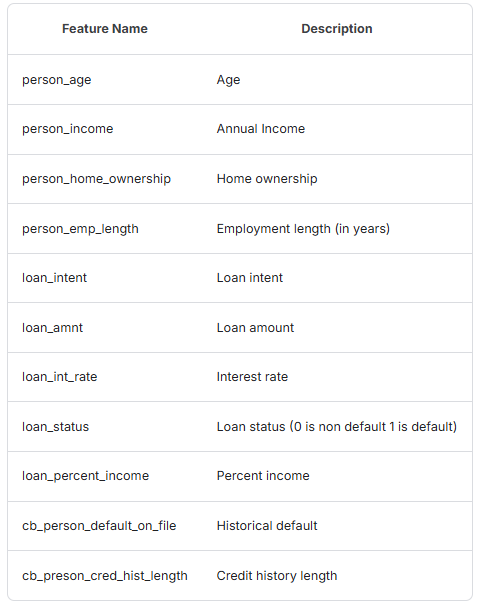

In [1]:
#pip install seaborn

______________________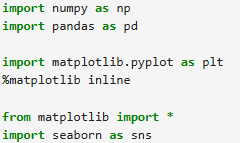

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import *
import seaborn as sns

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________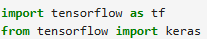

In [11]:
import tensorflow as tf 
from tensorflow import keras

___________________

In [10]:
print(tf.version_

2.18.0


______________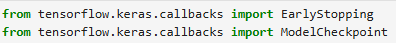

In [11]:
from tesnorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import 

__________________

In [13]:
np.random.seed(42)

_____________________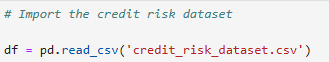

In [15]:
df = pd.read_csv('credit_risk_dataset.csv')

____________________

In [17]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4

__________________________

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________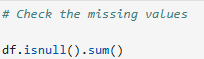

In [21]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [23]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [27]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
# It doesn't have any NaN(s)

____________________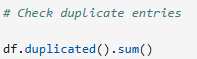

In [3]:
import pandas as pd

# Example DataFrame (replace this with your own DataFrame)
data = {'col1': [1, 2, 2, 4, 5],
        'col2': [10, 20, 20, 40, 50]}

df = pd.DataFrame(data)

# Now check for duplicates
print(df.duplicated().sum())

1


_________________________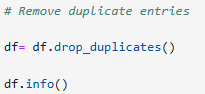

In [5]:
df= df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    4 non-null      int64
 1   col2    4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


_______________________________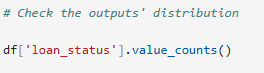

In [11]:
print(df.columns)

Index(['col1', 'col2'], dtype='object')


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Check the column names
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [15]:
# Count the occurrences of each unique value in the 'loan_status' column
print(df['loan_status'].value_counts())

loan_status
0    25473
1     7108
Name: count, dtype: int64


In [17]:
if 'loan_status' in df.columns:
    print(df['loan_status'].value_counts())
else:
    print("Column 'loan_status' not found in the dataset.")

loan_status
0    25473
1     7108
Name: count, dtype: int64


__________________________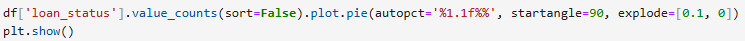

<Axes: ylabel='count'>

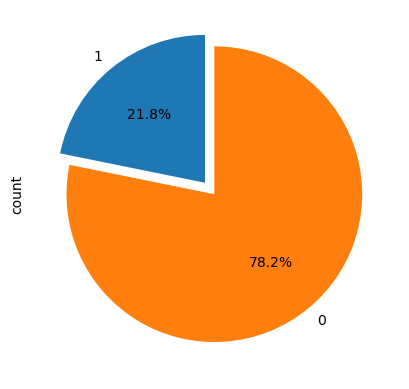

In [21]:
df['loan_status'].value_counts(sort=False).plot.pie(
    autopct='%1.1f%%', startangle=90, explode=[0.1, 0]
)

In [25]:
# The dataset is unbalanced

_____________________________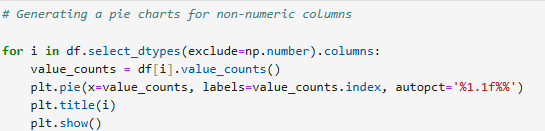

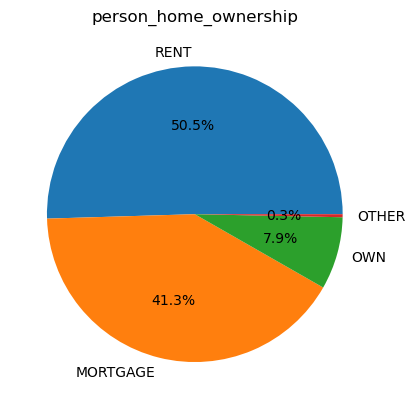

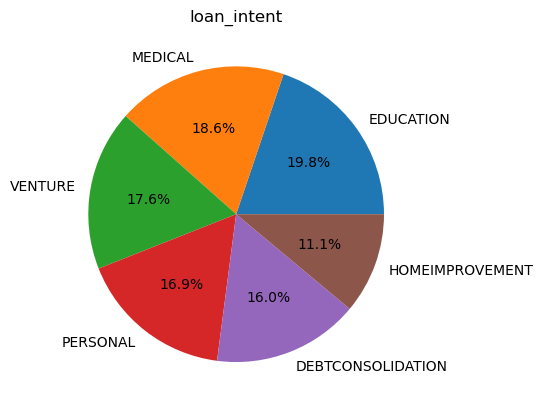

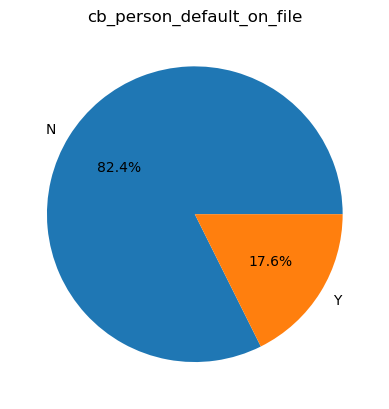

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Importing NumPy

# Assuming df is your DataFrame
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

_____________________________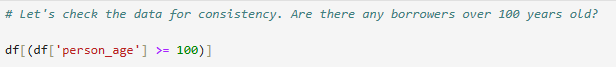

In [31]:
df[df['person_age'] >= 100]

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
32297         144        6000000              MORTGAGE               12.0   

      loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
81        VENTURE       4800          13.57            0                 0.02   
183     EDUCATION       6000          11.86            0                 0.03   
575     EDUCATION      20400          10.25            0                 0.25   
747       VENTURE      20000            NaN            0                 0.26   
32297    PERSONAL       5000          12.73            0                 0.00   

      cb_person_default_on_file  cb_person_cred_hist_length  
81                            N                           3  
183                           N                           2  
575                           N                           3  
747                           N                           4  
32297                         N                          25

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [43]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

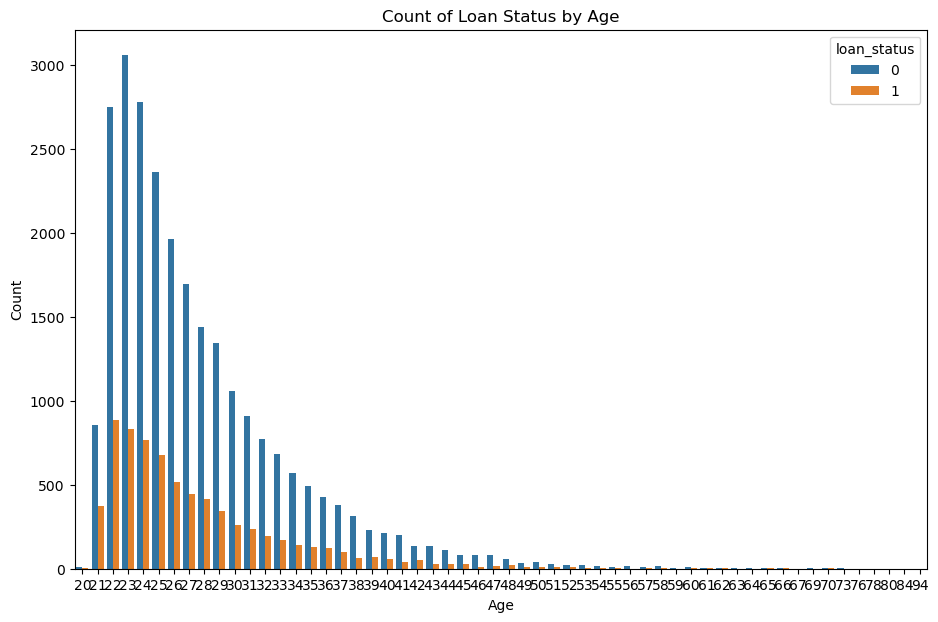

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

fig = plt.figure(figsize=(11, 7))
sns.countplot(data=df, x='person_age', hue='loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Loan Status by Age')
plt.show()

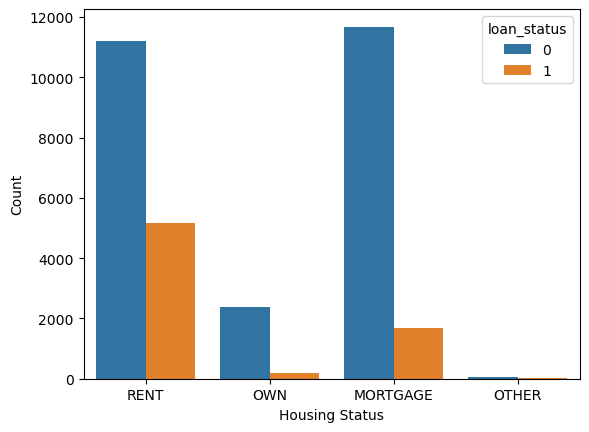

In [30]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [31]:
# Renters often default on loans, homeowners rarely do

______________________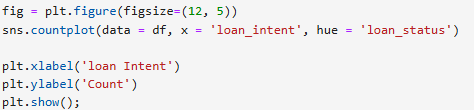

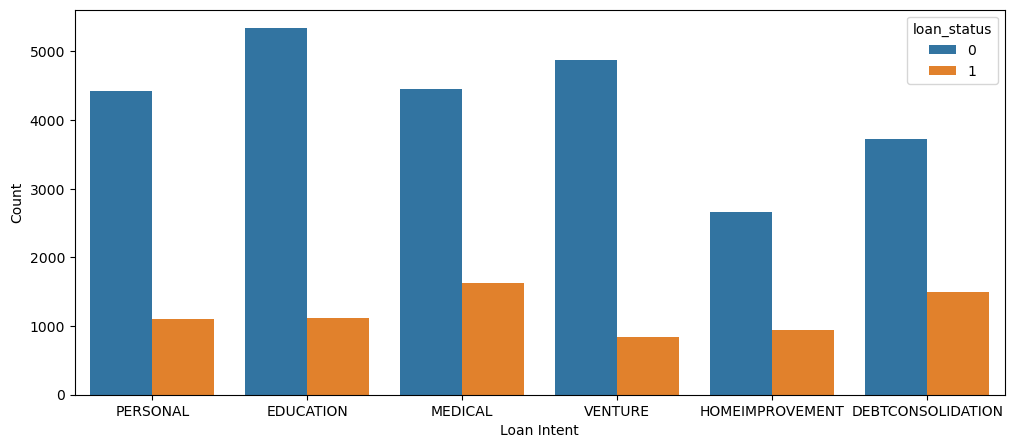

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='loan_intent', hue='loan_status')  # Fixing the quotes

plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

In [33]:
# Medical loans and Debt-Consolidation loans are more risky

________________________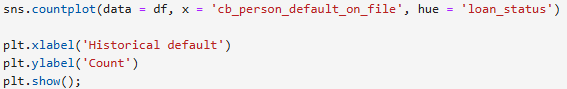

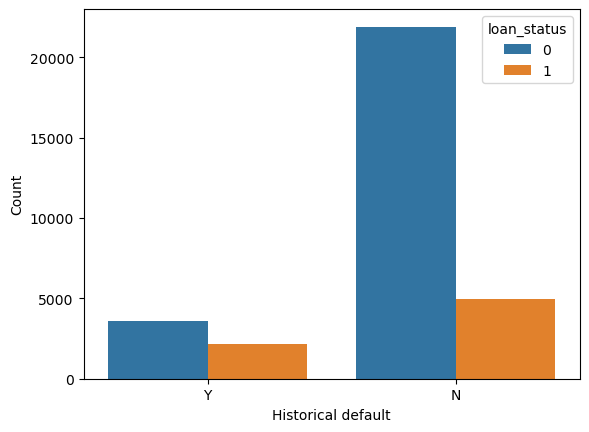

In [53]:
sns.countplot(data=df, x='cb_person_default_on_file', hue='loan_status') 

plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show()

In [35]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [55]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

______________________

In [57]:
df.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      1                5.0   
2          25           9600                      2                1.0   

   loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0            0      35000          16.02            1                 0.59   
1            1       1000          11.14            0                 0.10   
2            2       5500          12.87            1                 0.57   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          0                           3  
1                          1                           2  
2                          1                           3

_________________________

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32576 non-null  int64  
 1   person_income               32576 non-null  int64  
 2   person_home_ownership       32576 non-null  int64  
 3   person_emp_length           31681 non-null  float64
 4   loan_intent                 32576 non-null  int64  
 5   loan_amnt                   32576 non-null  int64  
 6   loan_int_rate               29461 non-null  float64
 7   loan_status                 32576 non-null  int64  
 8   loan_percent_income         32576 non-null  float64
 9   cb_person_default_on_file   32576 non-null  int64  
 10  cb_person_cred_hist_length  32576 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________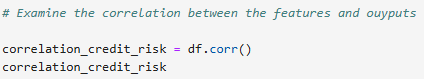

In [61]:
correlation_credit_risk = df.corr()
correlation_credit_risk

person_age  person_income  person_home_ownership  \
person_age                    1.000000       0.140404               0.032202   
person_income                 0.140404       1.000000               0.231308   
person_home_ownership         0.032202       0.231308               1.000000   
person_emp_length             0.166249       0.152717               0.231157   
loan_intent                   0.027196       0.023870               0.017760   
loan_amnt                     0.051566       0.317482               0.129083   
loan_int_rate                 0.011967      -0.001243              -0.139253   
loan_status                  -0.020721      -0.168507              -0.218746   
loan_percent_income          -0.041665      -0.294525              -0.135297   
cb_person_default_on_file    -0.007176       0.002566               0.061571   
cb_person_cred_hist_length    0.878092       0.123006               0.024981   

                            person_emp_length  loan_intent  loan_amnt  \
person_age                           0.166249     0.027196   0.051566   
person_income                        0.152717     0.023870   0.317482   
person_home_ownership                0.231157     0.017760   0.129083   
person_emp_length                    1.000000     0.016398   0.113142   
loan_intent                          0.016398     1.000000   0.018714   
loan_amnt                            0.113142     0.018714   1.000000   
loan_int_rate                       -0.056440     0.006333   0.146879   
loan_status                         -0.082475     0.065350   0.105411   
loan_percent_income                 -0.054047    -0.002014   0.572567   
cb_person_default_on_file            0.027713    -0.010477  -0.039104   
cb_person_cred_hist_length           0.144487     0.017089   0.042119   

                            loan_int_rate  loan_status  loan_percent_income  \
person_age                       0.011967    -0.020721            -0.041665   
person_income                   -0.001243    -0.168507            -0.294525   
person_home_ownership           -0.139253    -0.218746            -0.135297   
person_emp_length               -0.056440    -0.082475            -0.054047   
loan_intent                      0.006333     0.065350            -0.002014   
loan_amnt                        0.146879     0.105411             0.572567   
loan_int_rate                    1.000000     0.335169             0.120414   
loan_status                      0.335169     1.000000             0.379374   
loan_percent_income              0.120414     0.379374             1.000000   
cb_person_default_on_file       -0.501109    -0.179111            -0.035876   
cb_person_cred_hist_length       0.016639    -0.015504            -0.031514   

                            cb_person_default_on_file  \
person_age                                  -0.007176   
person_income                                0.002566   
person_home_ownership                        0.061571   
person_emp_length                            0.027713   
loan_intent                                 -0.010477   
loan_amnt                                   -0.039104   
loan_int_rate                               -0.501109   
loan_status                                 -0.179111   
loan_percent_income                         -0.035876   
cb_person_default_on_file                    1.000000   
cb_person_cred_hist_length                  -0.004594   

                            cb_person_cred_hist_length  
person_age                                    0.878092  
person_income                                 0.123006  
person_home_ownership                         0.024981  
person_emp_length                             0.144487  
loan_intent                                   0.017089  
loan_amnt                                     0.042119  
loan_int_rate                                 0.016639  
loan_status                                  -0.015504  
loan_percent_income                        

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [65]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

loan_status
loan_status                    1.000000
loan_percent_income            0.379374
loan_int_rate                  0.335169
loan_amnt                      0.105411
loan_intent                    0.065350
cb_person_cred_hist_length    -0.015504
person_age                    -0.020721
person_emp_length             -0.082475
person_income                 -0.168507
cb_person_default_on_file     -0.179111
person_home_ownership         -0.218746

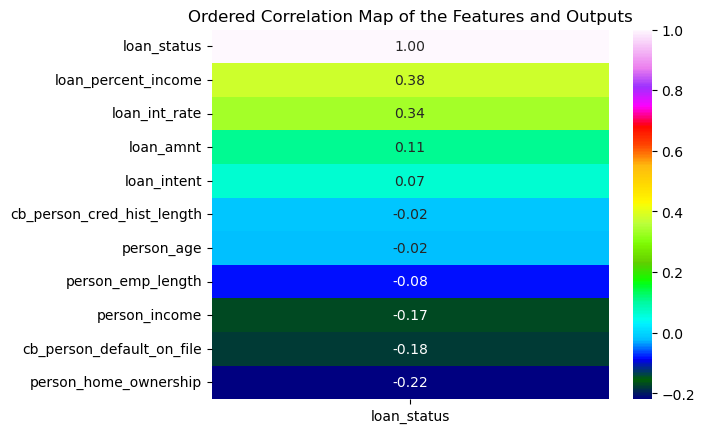

In [67]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

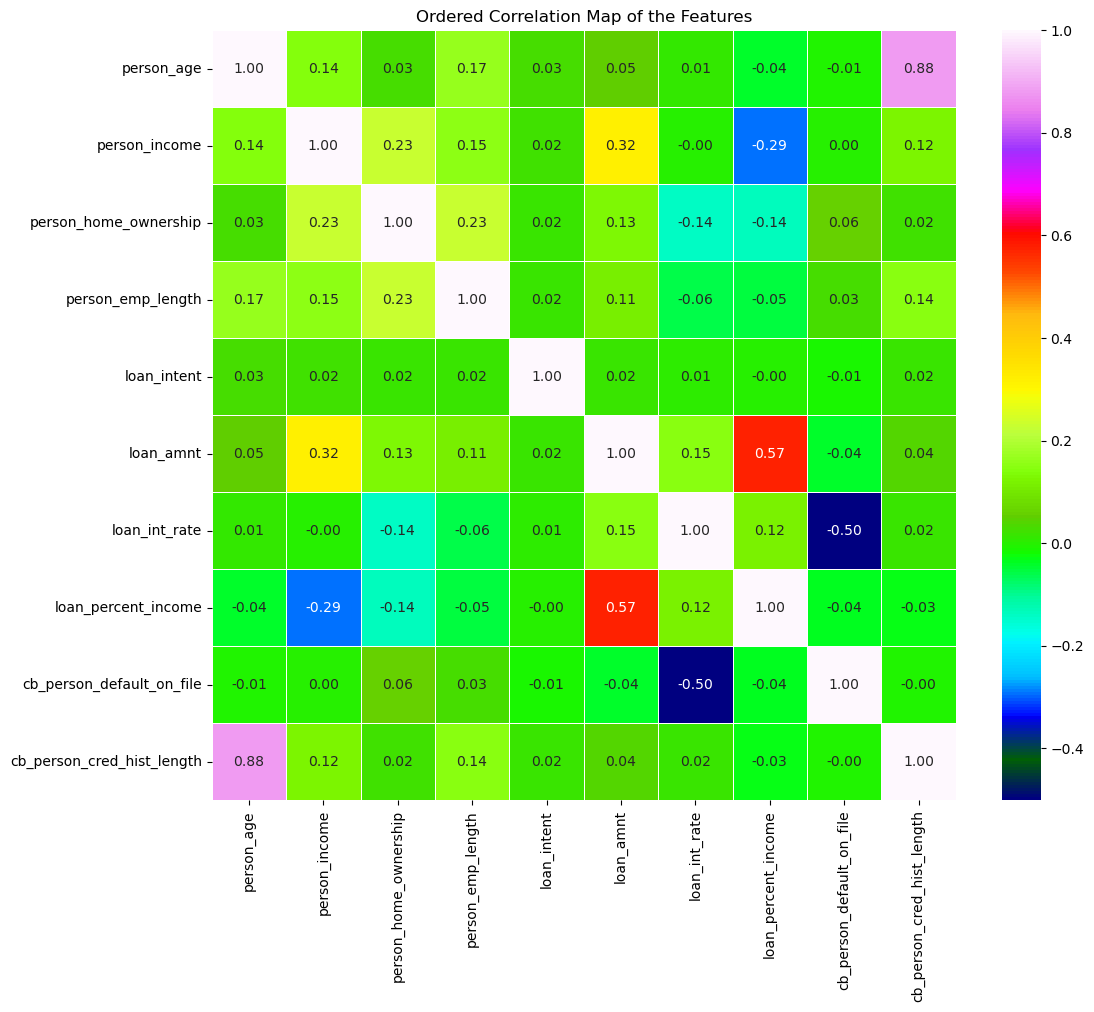

In [69]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________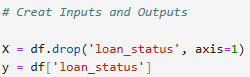

In [71]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

___________________________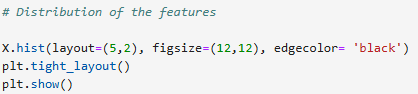

In [75]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd

data = pd.read_csv('credit_risk_dataset.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB
None


In [81]:
import pandas as pd

data = pd.DataFrame(data)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB
None


#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [83]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [93]:
import pandas as pd

# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')

# Check the first few rows of the dataset
print(data.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y             

In [95]:
# Get a summary of the dataset
print(data.info())

# Check for any missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB
None
person_age                       0
person_income                    0
person_home_o

In [99]:
# Check column names to ensure 'credit_risk' exists
print(data.columns)

# Assuming the column for target variable is named 'credit_risk'
X = data.drop(columns=['credit_risk'])  # Features
y = data['credit_risk']  # Target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_imb = scaler.fit_transform(X_train)

# Transform the test data
X_test_imb = scaler.transform(X_test)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_imb, y_train)

# Make predictions
y_pred = model.predict(X_test_imb)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


KeyError: "['credit_risk'] not found in axis"

___________________________

In [109]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')

# Print all columns to verify
print("Column names in the dataset:")
print(data.columns)

# Remove extra spaces from column names (if any)
data.columns = data.columns.str.strip()

# Display the first few rows to identify the target column
print("\nDataset preview:")
print(data.head())

# Check for possible alternative names for the target column
print("\nCheck the possible names for the target variable:")
print(data.describe(include='all'))

Column names in the dataset:
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

Dataset preview:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____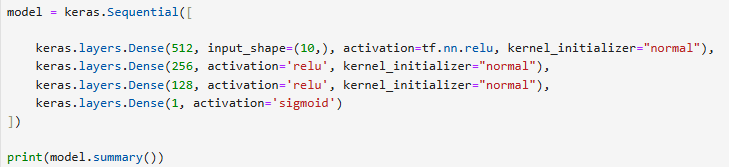

C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


____________________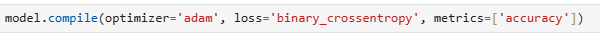

__________________________

___________________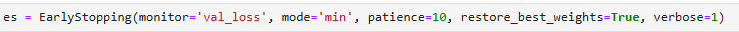

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________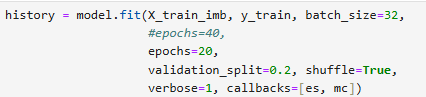

Epoch 1/40
645/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8323 - loss: 0.3913
Epoch 1: val_loss improved from inf to 0.32382, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8325 - loss: 0.3910 - val_accuracy: 0.8696 - val_loss: 0.3238
Epoch 2/40
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8717 - loss: 0.3248
Epoch 2: val_loss improved from 0.32382 to 0.31118, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8717 - loss: 0.3248 - val_accuracy: 0.8756 - val_loss: 0.3112
Epoch 3/40
642/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8796 - loss: 0.3106
Epoch 3: val_loss did not improve from 0.31118
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8796 - loss: 0.3106 - val_accuracy: 0.8750 - val_loss: 0.3134
Epoch 4/40
642/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8843 - loss: 0.3067
Epoch 4: val_loss improved from 0.31118 to 0.29802, saving model to best_model_MLP

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

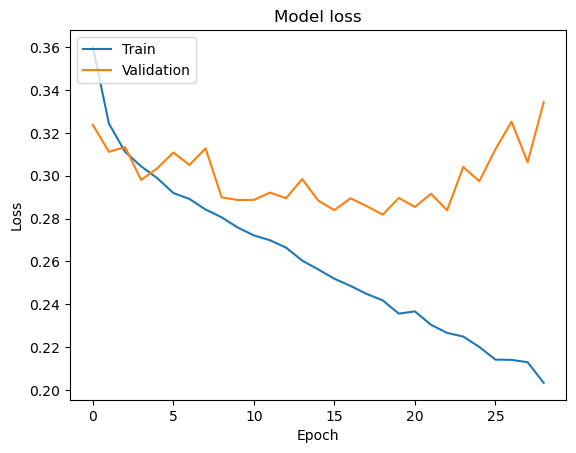

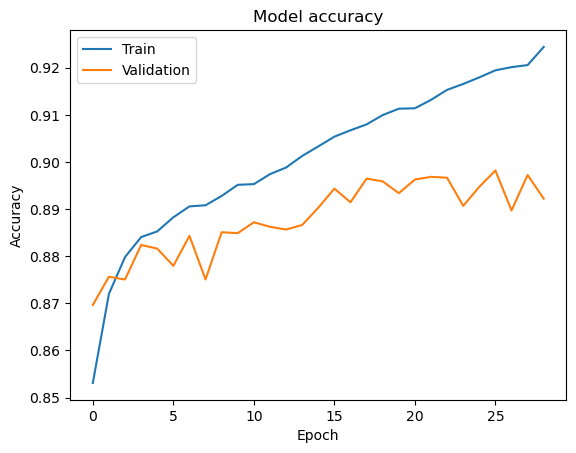

In [57]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________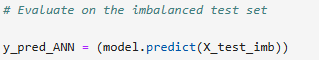

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [59]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

[[0.9390531 ]
 [0.0165406 ]
 [0.00343121]
 [0.03886017]
 [0.14824712]
 [1.        ]
 [0.0024029 ]
 [0.17584124]
 [0.16354638]
 [0.03115995]]


Imbalanced MLP Dataset Results
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5080
           1       0.84      0.65      0.73      1403

    accuracy                           0.90      6483
   macro avg       0.87      0.81      0.83      6483
weighted avg       0.89      0.90      0.89      6483



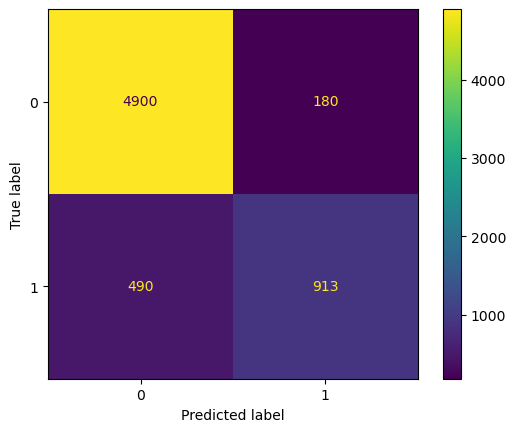

In [60]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________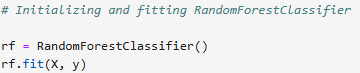

RandomForestClassifier()

_______________________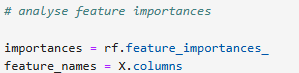

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [64]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [65]:
# Print feature ranking

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature loan_percent_income (0.230671)
2. feature loan_int_rate (0.191496)
3. feature person_income (0.163662)
4. feature person_home_ownership (0.099508)
5. feature loan_amnt (0.080421)
6. feature loan_intent (0.065819)
7. feature person_emp_length (0.063068)
8. feature person_age (0.049802)
9. feature cb_person_cred_hist_length (0.039702)
10. feature cb_person_default_on_file (0.015853)


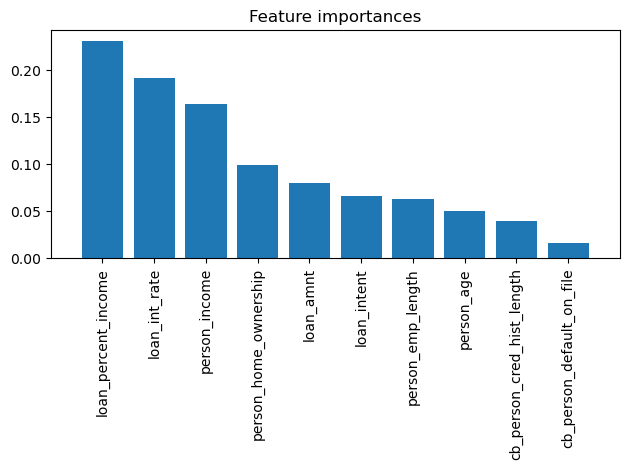

In [66]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [67]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

______________________

__________________________

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5080
           1       0.94      0.65      0.77      1403

    accuracy                           0.91      6483
   macro avg       0.92      0.82      0.86      6483
weighted avg       0.92      0.91      0.91      6483



#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

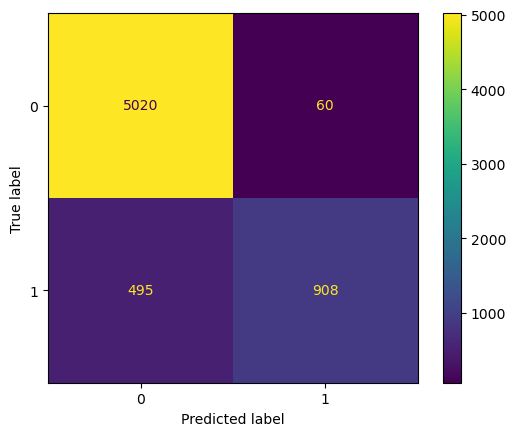

In [70]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [72]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [73]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [74]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [75]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.84


______________________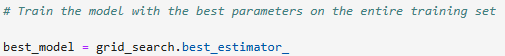

_________________________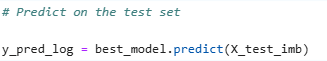

_________________________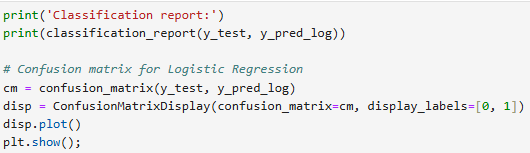

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



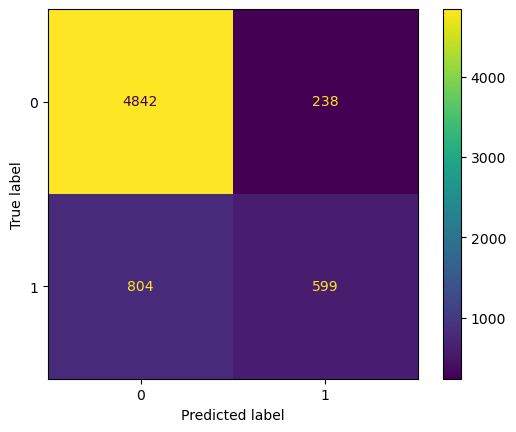

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [81]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [82]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________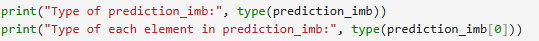

Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


_________________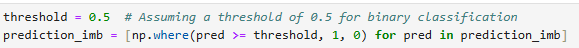

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [85]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [86]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Result of testing with an Imbalanced Dataset


Imbalance AI Models  Accuracy  Precision  Recall  F1-Score    AUC
0        Random Forest     91.44      91.63   91.44     90.83  81.77
1  Logistic Regression     83.93      82.69   83.93     82.32  69.00
2                  MLP     89.67      89.31   89.67     89.18  80.77

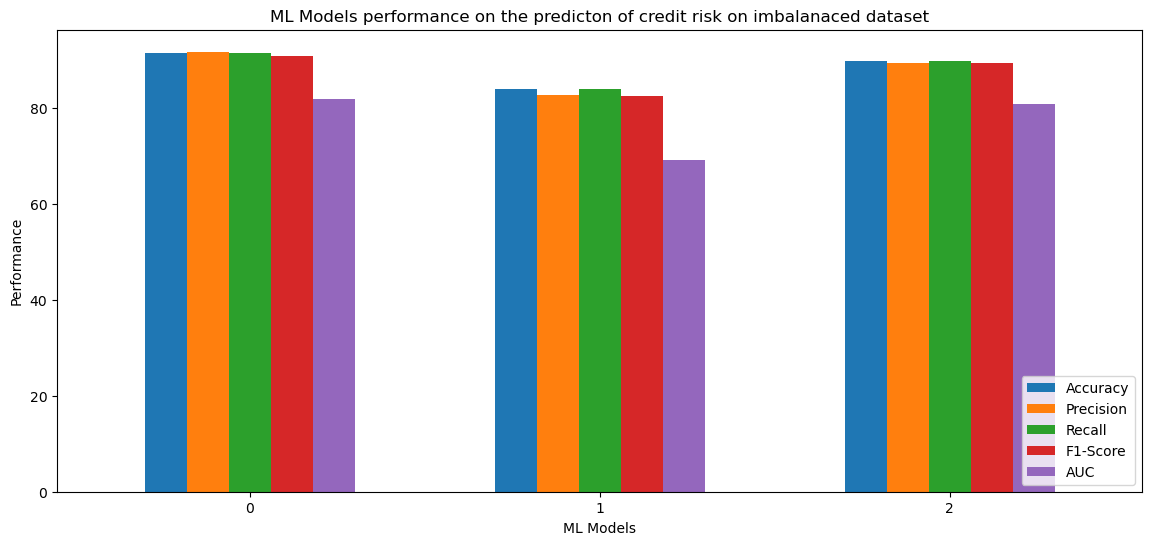

In [87]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

In [112]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [114]:
X = np.random.rand(1000, 10)  
y = np.random.randint(0, 2, 1000)  

X = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5412 - loss: 0.6919 - val_accuracy: 0.4850 - val_loss: 0.6969
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5176 - loss: 0.6923 - val_accuracy: 0.4850 - val_loss: 0.6957
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5205 - loss: 0.6926 - val_accuracy: 0.4900 - val_loss: 0.6945
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5345 - loss: 0.6900 - val_accuracy: 0.4850 - val_loss: 0.6958
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5308 - loss: 0.6892 - val_accuracy: 0.4900 - val_loss: 0.6959
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5741 - loss: 0.6858 - val_accuracy: 0.4900 - val_loss: 0.6948
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5560 - loss: 0.6888 - val_accuracy: 0.5050 - val_loss: 0.6956
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5370 - loss: 0.6875 - val_accuracy: 0.4850 - val_loss

In [118]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
Accuracy: 0.47
Precision: 0.47
Recall: 0.72
F1-Score: 0.57
AUC: 0.50


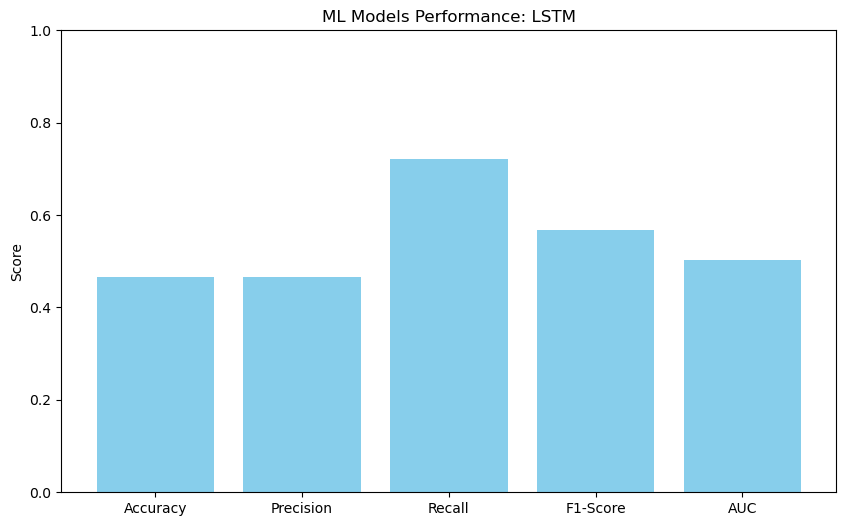

In [120]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title('ML Models Performance: LSTM')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()